# Notebook for doing some scratch work

## Collecting Wikipedia articles

In [65]:
import wikipedia
from tqdm import tqdm
# using 3 distinct topics for testing
some_wikipedia_articles = wikipedia.random(20)

SUMMARY_PATH = "../data/wiki_data/summary/"
CONTENT_PATH = "../data/wiki_data/content/"

# write to the data sources
for article in tqdm(some_wikipedia_articles):
    file_topic = "_".join(article.split())
    # Use summary of wikipedia articles as the data source
    if not os.path.exists(SUMMARY_PATH+f"{file_topic}.txt"):
        with open(SUMMARY_PATH+f"{file_topic}.txt", "w") as f:
            f.write(wikipedia.page(article).summary)
    # try with entire wiki page too
    if not os.path.exists(CONTENT_PATH+f"{file_topic}.txt"):
        with open(CONTENT_PATH+f"{file_topic}.txt", "w") as f:
            f.write(wikipedia.page(article).content)
    print(article)

  5%|▌         | 1/20 [00:02<00:40,  2.13s/it]

St Afan's Church, Llanafan


 10%|█         | 2/20 [00:03<00:36,  2.03s/it]

Full Stop (G.E.M. song)


 15%|█▌        | 3/20 [00:05<00:32,  1.92s/it]

Suwat Woradilok


 20%|██        | 4/20 [00:07<00:29,  1.81s/it]

Mogadore, Ohio


 25%|██▌       | 5/20 [00:08<00:26,  1.76s/it]

Rock Creek Gold Rush


 30%|███       | 6/20 [00:10<00:23,  1.71s/it]

Sequence of tenses


 35%|███▌      | 7/20 [00:11<00:21,  1.66s/it]

2013 Denver Outlaws season


 40%|████      | 8/20 [00:13<00:20,  1.68s/it]

National Register of Historic Places listings in Burleson County, Texas


 45%|████▌     | 9/20 [00:15<00:18,  1.64s/it]

Tsukiakari no Michishirube


 50%|█████     | 10/20 [00:16<00:15,  1.60s/it]

Valgeir Sigurðsson


 50%|█████     | 10/20 [00:17<00:17,  1.70s/it]


KeyboardInterrupt: 

## Read the data from the source and also note the file names

In [39]:
import os

(_, _, filenames) = next(os.walk(CONTENT_PATH))

In [40]:
text_data = []
labels = []
for filename in filenames:
    with open(CONTENT_PATH+filename, "r") as f:
        text_data.append(" ".join(f.readlines()))
    labels.append(filename[:-4])

## Cleaning up the text

In [41]:
example = text_data[0]

example[:100]

'In chemistry, alcohol is an organic compound that carries at least one hydroxyl functional group (−O'

In [42]:
example = example.lower()

example[:100]

'in chemistry, alcohol is an organic compound that carries at least one hydroxyl functional group (−o'

In [43]:
symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n,—'"
for x in symbols:
    example = example.replace(x, ' ')

example[:100]

'in chemistry  alcohol is an organic compound that carries at least one hydroxyl functional group  −o'

In [44]:
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize

# nltk.download('stopwords')
default_stop_words = stopwords.words('english')

valid_words = [x for x in word_tokenize(example) if x not in default_stop_words and x.isalpha()]
" ".join(valid_words)[:100]

'chemistry alcohol organic compound carries least one hydroxyl functional group bound saturated carbo'

In [45]:
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer()
stemmer= SnowballStemmer("english")

stemmed_words = [stemmer.stem(x) for x in valid_words]
" ".join(stemmed_words)[:100]

'chemistri alcohol organ compound carri least one hydroxyl function group bound satur carbon atom ter'

In [46]:
lemmatized_words = [lemmatizer.lemmatize(x) for x in valid_words]
" ".join(lemmatized_words)[:100]

'chemistry alcohol organic compound carry least one hydroxyl functional group bound saturated carbon '

In [47]:
# looks safe to just lemmatize then stem
stemmed_lemmatized_words = [stemmer.stem(lemmatizer.lemmatize(x)) for x in valid_words]
" ".join(stemmed_lemmatized_words)[:100]

'chemistri alcohol organ compound carri least one hydroxyl function group bound satur carbon atom ter'

In [48]:
cleaned_text = " ".join(stemmed_lemmatized_words)

In [49]:
# now to do this in a for loop
SYMBOLS = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n,—'"
STOP_WORDS = stopwords.words('english')

# we also want to keep track of the original and cleaned words so that they can be mapped back
original_words = []
changed_words = []
data = []

for text in text_data:
    text = text.lower()
    for symbol in SYMBOLS:
        text = text.replace(symbol, ' ')
    valid_words = [x for x in word_tokenize(text) if x not in STOP_WORDS and x.isalpha()]
    stemmed_lemmatized_words = [stemmer.stem(lemmatizer.lemmatize(x)) for x in valid_words]
    cleaned_text = " ".join(stemmed_lemmatized_words)
    original_words.extend(valid_words)
    changed_words.extend(stemmed_lemmatized_words)
    data.append(cleaned_text)

In [50]:
# can't use dictionary because some stems have multiple original words: I will use pandas
import pandas as pd

changed_to_original = pd.Series(original_words, index=changed_words)

## Tf-idf Vectorization

In [214]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [226]:
vectorizer = TfidfVectorizer(max_df=0.5, min_df=0.2, stop_words='english', use_idf=False, sublinear_tf=True)
vectors = vectorizer.fit_transform(data)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

In [216]:
df.head()

,abandon,abil,abl,absenc,absorb,accept,access,account,achiev,acquir,...,woman,word,worker,worldwid,write,writer,written,wrote,york,young
0,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.165268,0.000000,0.000000,0.0,0.000000,0.000000,0.053668,0.000000,0.0
1,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,0.0,0.0305,0.042986,0.018014,0.0,0.0,0.050290,0.0,0.042986,0.018014,...,0.018014,0.042986,0.018014,0.050290,0.0,0.018014,0.018014,0.000000,0.059492,0.0
3,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.058852,0.0,0.078290,0.078290,...,0.047481,0.000000,0.058852,0.058852,0.0,0.000000,0.028043,0.000000,0.110615,0.0
4,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0


## KMeans Clustering

In [217]:
from sklearn.cluster import KMeans

In [218]:
import numpy as np

In [219]:
# want to find number of clusters first
t = (df != 0).sum().sum()
m, n = df.shape
n_clusters = int(round((m*n)/t))

In [231]:
km = KMeans(n_clusters=5)
km.fit(vectors)

KMeans(n_clusters=5)

In [210]:
from sklearn.metrics import silhouette_score

In [230]:
silhouette_score(df, km.labels_)

AttributeError: 'KMeans' object has no attribute 'labels_'

In [212]:
len(df)

54

In [213]:
x = []
y = []
for i in range(2, 50):
    km = KMeans(n_clusters=i)
    km.fit(df)
    x.append(i)
    y.append(silhouette_score(df, km.labels_))

KeyboardInterrupt: 

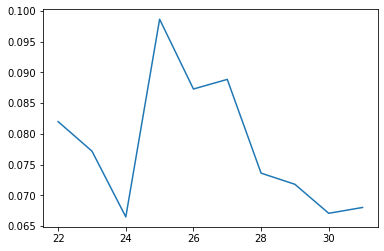

In [145]:
plt.plot(x[20:30], y[20:30])

In [228]:
# print results as well as the prominent words
centers_ordered = km.cluster_centers_.argsort()[:, ::-1] 
for i in range(5):
    indices = np.where(km.labels_ == i)[0]
    cluster_labels = [labels[i] for i in indices]
    print(f"Cluster #{i}:", ", ".join(cluster_labels))
    prominent_words = changed_to_original.loc[df.columns[centers_ordered[i][:5]]].unique()
    print("Prominent words:", ", ".join(prominent_words))
    print("==============================\n")

Cluster #0: Alcohol, Fähnrich_(East_Germany), Al_Kharayej, Amane, South_African_Class_MH_2-6-6-2, Winter, Hoopes-Cunningham_Mansion, Drug, Stygionympha_vigilans, Dishman_Pharmaceuticals_and_Chemicals, Alex_Yam, Manitoba_Games, Summer, Santa_Inés,_Bogotá, Two_Monkeys, Hand_sanitizer, 1995–96_Liechtenstein_Cup, 2006–07_WWHL_season, MS_Parafly_Skyward, Ghaghar_Burhi, Yagodinska_Cave, Apamea_maxima, Apple, Rhodactina, Food, Nicholas_Daniloff, American_Music_Awards_of_1976
Prominent words: families, family, held, south, western, westerners, season, seasons, seasonal, seasonally, seasonality, seasoned

Cluster #1: Television, IBM, Book, Apple_Inc., Google, Artificial_Intelligence, Mexico, Japan, Machine_learning, Data_Science, Korea, Computer_Science
Prominent words: data, computer, computers, computing, computational, computationally, computations, computation, computed, compute, computationalism, computes, computics, computability, computable, technology, technologies, technological, techn

In [222]:
test = df.copy()

In [223]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X_embedded = TSNE(n_components=2, perplexity=3, n_iter=2000).fit_transform(test)

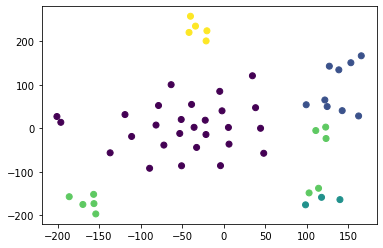

In [224]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=km.labels_, cmap='viridis')

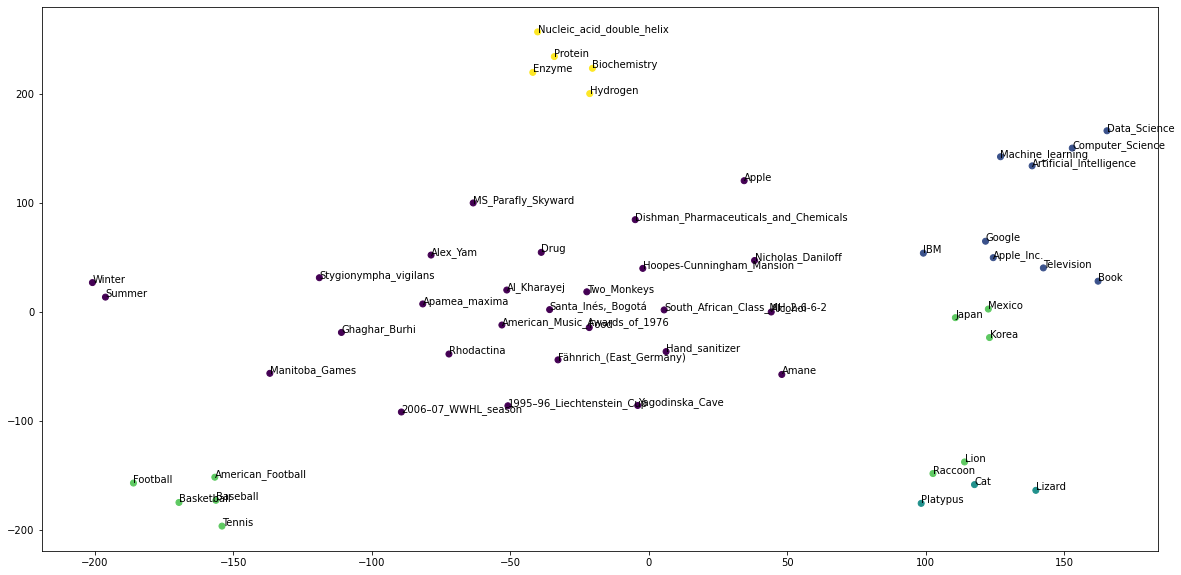

In [225]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=km.labels_, cmap='viridis')
for i, txt in enumerate(labels):
    ax.annotate(txt, (X_embedded[:, 0][i], X_embedded[:, 1][i]))